In [1]:
import numpy as np
import matplotlib.pyplot as plt

from coffea import hist
from coffea import util
import os

In [2]:
bkg_dir = "/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/outputs/bkg/bkg_2018_QCD_TuneCP5_PSWeights_SR_studies/"
sig_dir = "/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/outputs/signal/signal_2018_aEM_SR_studies/"

f_bkg = util.load(bkg_dir+'combined.coffea')
f_sig = util.load(sig_dir+'combined.coffea')

cutNames = f_sig['cutDesc']

# combining background "samples" (HT bins) into single cutflow
cf_bkg_split = f_bkg['cutflows']
cf_bkg = 0
for i,k in enumerate(cf_bkg_split.keys()):
    if i==0:
        cf_bkg = cf_bkg_split[k]
    else:
        cf_bkg += cf_bkg_split[k]
        
# Loading signal cutflows
cf_sig = f_sig['cutflows']

In [19]:
from XRootD import client
import uproot
pref="/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/AODSkimmer/crab/"
txtFiles = [pref+f for f in os.listdir(pref) if ".txt" in f]
xrdClient = client.FileSystem("root://cmseos.fnal.gov")
n_tot = 0
for tf in txtFiles:
    with open(tf) as tff:
        files = tff.read().splitlines()
    for f in files:
        with uproot.open("root://cmsxrootd.fnal.gov/"+f)['ntuples/outT'] as t:
            n_tot += t.num_entries
print(n_tot)

287885303


In [3]:
cf_bkg

defaultdict_accumulator(int,
                        {'initial': 287885303,
                         'cut0': 94318849,
                         'cut1': 94224192,
                         'cut2': 88291097,
                         'cut3': 414123,
                         'cut4': 62281,
                         'cut5': 60865,
                         'cut6': 22166,
                         'cut7': 18457,
                         'cut8': 17736,
                         'cut9': 16498,
                         'cut10': 5751,
                         'cut11': 2101,
                         'cut12': 1110})

In [69]:
cf_sig

{'sig_2018_Mchi-10p5_dMchi-1p0_ctau-1000': defaultdict_accumulator(int,
                         {'initial': 32977,
                          'cut0': 5265,
                          'cut1': 5264,
                          'cut2': 5130,
                          'cut3': 812,
                          'cut4': 245,
                          'cut5': 244,
                          'cut6': 149,
                          'cut7': 143,
                          'cut8': 124,
                          'cut9': 115,
                          'cut10': 53,
                          'cut11': 47,
                          'cut12': 26}),
 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-100': defaultdict_accumulator(int,
                         {'initial': 32973,
                          'cut0': 6269,
                          'cut1': 6268,
                          'cut2': 6103,
                          'cut3': 880,
                          'cut4': 241,
                          'cut5': 238,
                    

In [18]:
# splitting up signal points by mchi
sig_pts = list(cf_sig.keys())
pts_by_mx1 = {}
for pt in sig_pts:
    mchi = float(pt.split("_")[2].split("-")[1].replace('p','.'))
    dmchi = float(pt.split("_")[3].split("-")[1].replace('p','.'))
    mx1 = mchi - 0.5*dmchi
    if mx1 not in pts_by_mx1.keys():
        pts_by_mx1[mx1] = []
    pts_by_mx1[mx1].append(pt)

In [5]:
# background cutflow
cuts = list(cf_bkg.keys())
xvals_bkg = np.arange(len(cuts))
yvals_bkg = [cf_bkg[cut]/cf_bkg['initial'] for cut in cuts]
cutDesc = f_bkg['cutDesc']

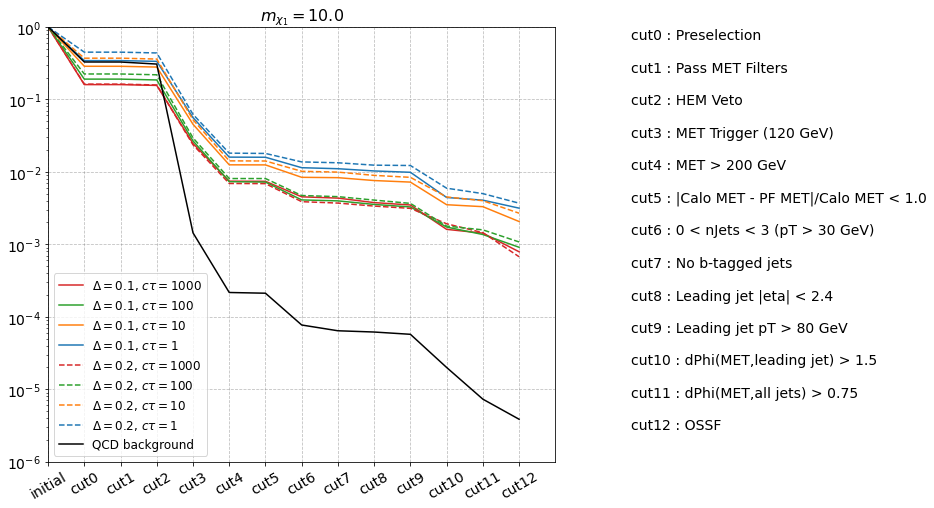

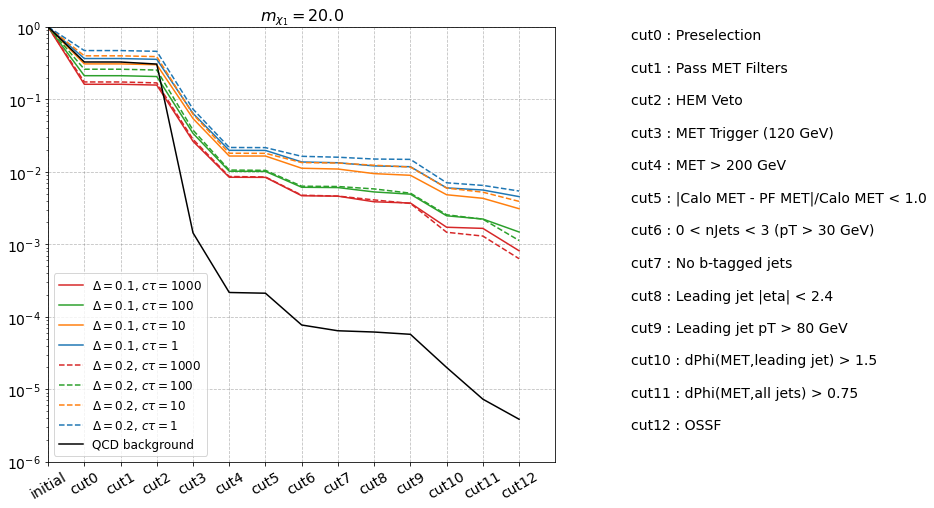

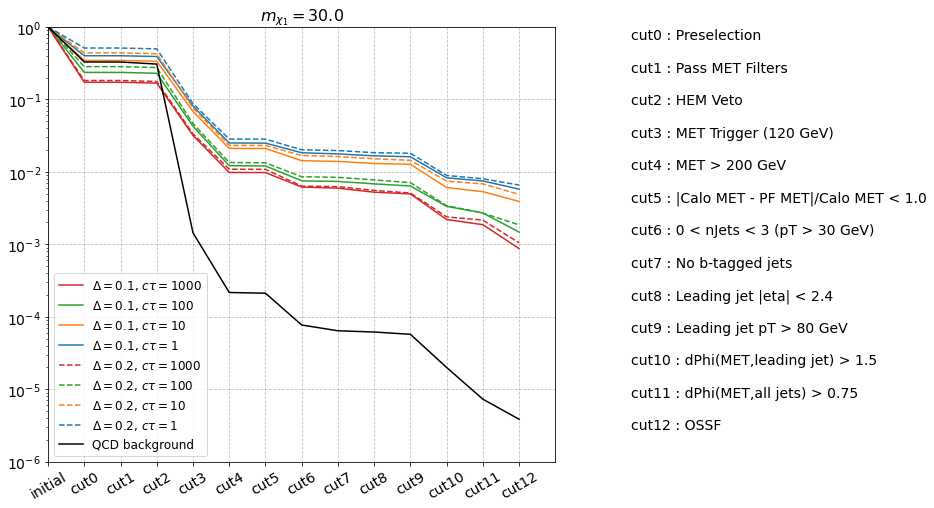

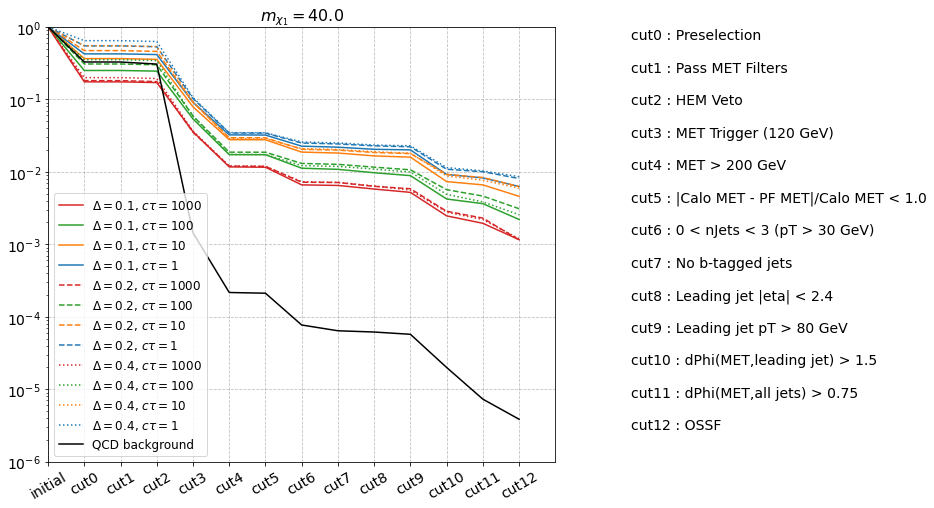

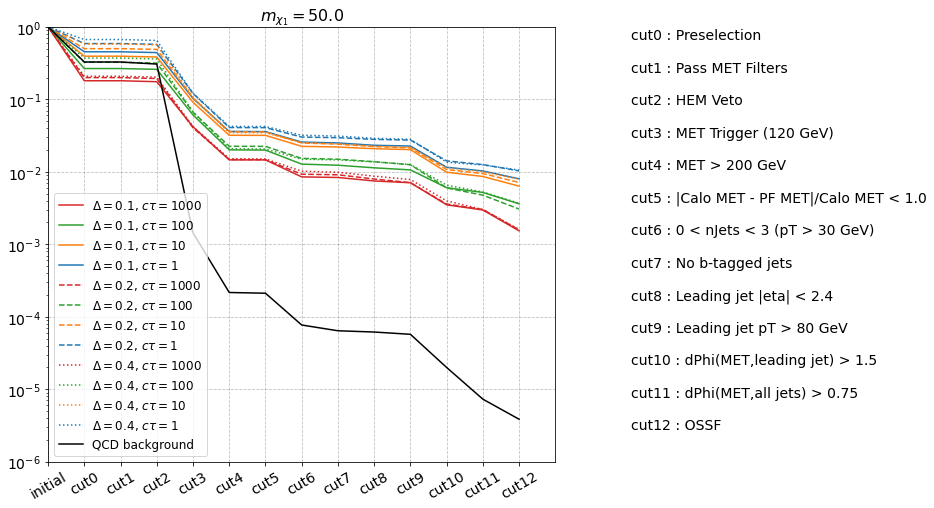

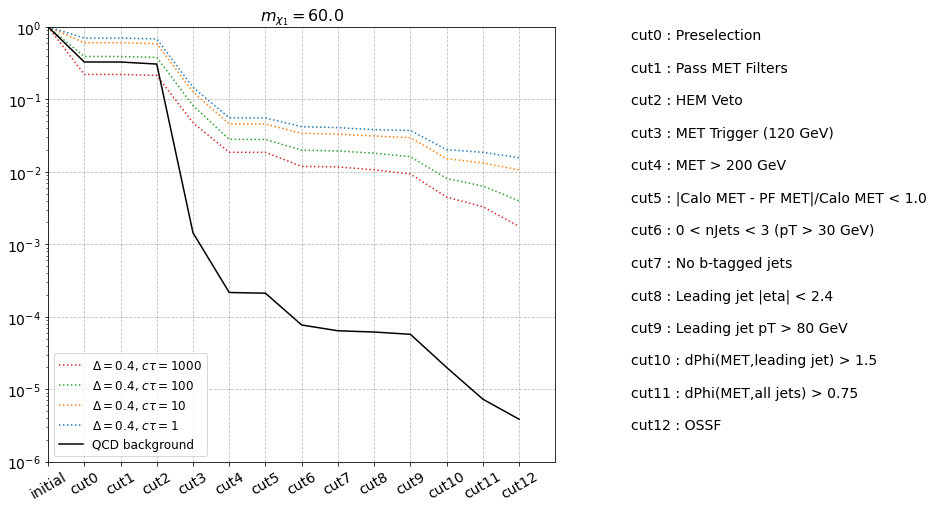

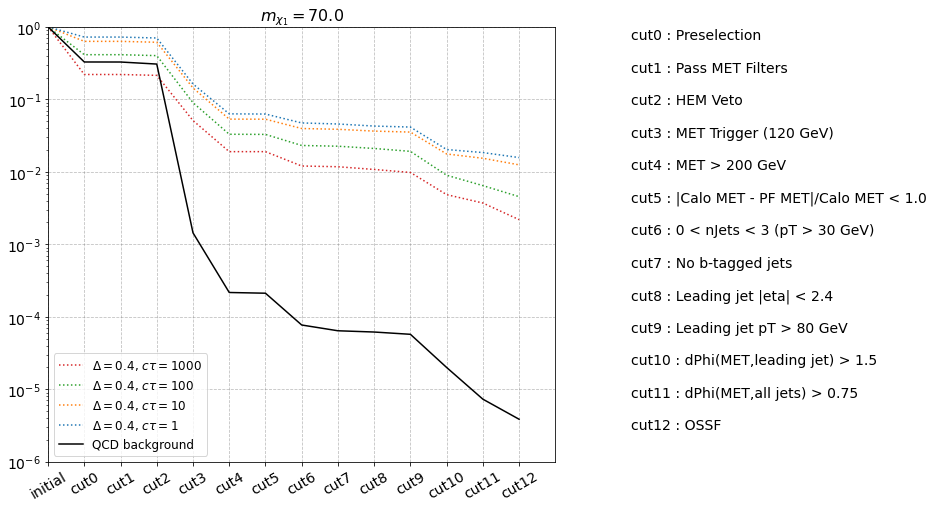

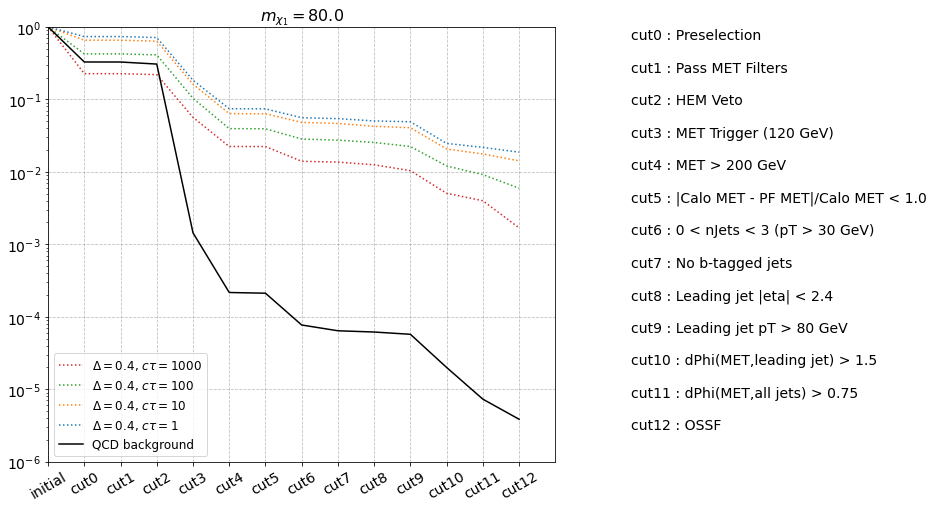

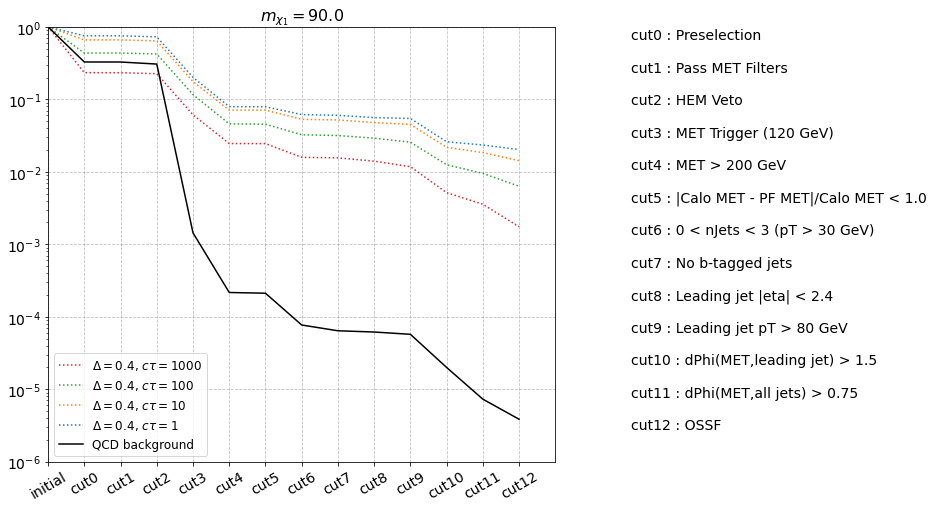

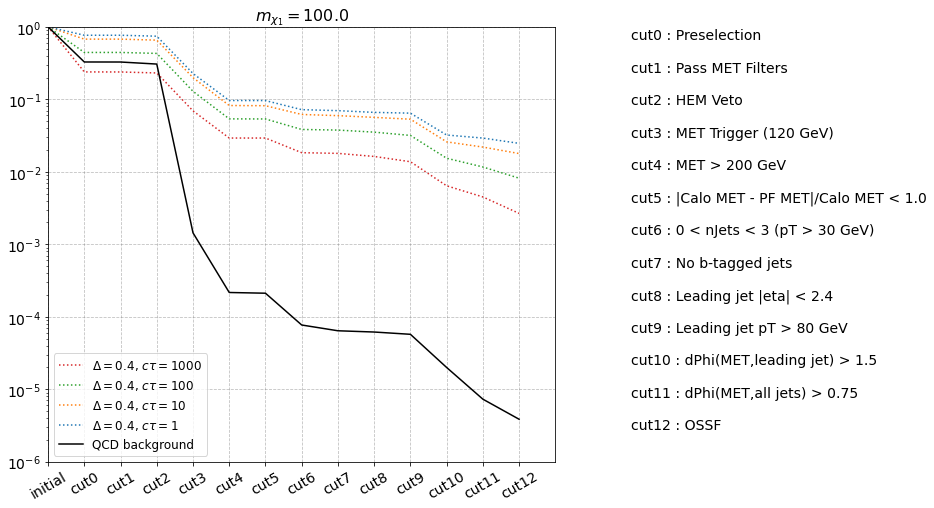

In [37]:
cuts = list(cf_sig[sig_pts[0]].keys())
linestyles = {0.1:'-',0.2:'--',0.4:':'}
colors = {1:'C0',10:'C1',100:'C2',1000:'C3'}
for mx1 in sorted(pts_by_mx1.keys()):
    fig, (a0,a1) = plt.subplots(1,2,gridspec_kw={'width_ratios':[2,1]},figsize=(15,8))
    pts = pts_by_mx1[mx1]
    for pt in pts:
        cf = cf_sig[pt]
        mchi = float(pt.split("_")[2].split("-")[1].replace('p','.'))
        dmchi = float(pt.split("_")[3].split("-")[1].replace('p','.'))
        ct = int(pt.split("_")[-1].split("-")[1])
        delta = dmchi/mx1
        xvals = np.arange(len(cuts))
        yvals = [cf[cut]/cf['initial'] for cut in cuts]
        a0.plot(xvals,yvals,label=r'$\Delta = {0:.1f}$, $c\tau = {1}$'.format(delta,ct),linestyle=linestyles[delta],color=colors[ct])
    a0.plot(xvals_bkg,yvals_bkg,label='QCD background',color='black')
    a0.set_xlim([0,xvals[-1]+1])
    a0.set_xticks(xvals,cuts,fontsize=14,rotation=30)
    a0.tick_params(axis='y',labelsize=14)
    a0.set_yscale('log')
    a0.set_ylim([1e-6,1])
    a0.grid(axis='both',linestyle='--',alpha=0.5,color='gray')
    a0.legend(loc='lower left',ncol=1,fontsize=12)
    
    a0.set_title(r'$m_{{\chi_1}} = {0}$'.format(mx1),fontsize=16)
    cut_info = ""
    for k in cutDesc.keys():
        cut_info += k+ " : "+cutDesc[k]+"\n\n"
    a1.text(0,0,cut_info,fontsize=14)
    a1.set_axis_off()
    plt.savefig('plots/cutflows/mx1_{0:.0f}.pdf'.format(mx1))

In [65]:
import pandas as pd
cuts = list(cf_sig[sig_pts[0]].keys())
df_mx = {}
for mx1 in sorted(pts_by_mx1.keys()):
    df_rows = {}
    pts = pts_by_mx1[mx1]
    for pt in pts:
        cf = cf_sig[pt]
        mchi = float(pt.split("_")[2].split("-")[1].replace('p','.'))
        dmchi = float(pt.split("_")[3].split("-")[1].replace('p','.'))
        ct = int(pt.split("_")[-1].split("-")[1])
        delta = dmchi/mx1
        name = "({0:.1f}, {1})".format(delta,ct)
        yvals = [cf[cut]/cf['initial'] for cut in cuts] 
        df_rows[name] = yvals
    df_mx[mx1] = df_rows
    df_mx['index_names'] = cuts
dfs = {mx:pd.DataFrame.from_dict(df).rename(index={i:cuts[i] for i in range(len(cuts))}) for mx,df in df_mx.items()}

In [66]:
print(pd.DataFrame.to_latex(dfs[80.0]))

\begin{tabular}{lrrrr}
\toprule
{} &  (0.4, 1000) &  (0.4, 100) &  (0.4, 10) &  (0.4, 1) \\
\midrule
initial &     1.000000 &    1.000000 &   1.000000 &  1.000000 \\
cut0    &     0.226211 &    0.423697 &   0.654653 &  0.734951 \\
cut1    &     0.225937 &    0.423582 &   0.654576 &  0.734797 \\
cut2    &     0.219086 &    0.410575 &   0.634203 &  0.711722 \\
cut3    &     0.056367 &    0.103358 &   0.161599 &  0.183477 \\
cut4    &     0.022351 &    0.039406 &   0.063551 &  0.074163 \\
cut5    &     0.022312 &    0.039251 &   0.063204 &  0.073893 \\
cut6    &     0.013974 &    0.028329 &   0.048040 &  0.055796 \\
cut7    &     0.013622 &    0.027364 &   0.046458 &  0.054136 \\
cut8    &     0.012487 &    0.025396 &   0.042406 &  0.050355 \\
cut9    &     0.010373 &    0.022347 &   0.040593 &  0.049004 \\
cut10   &     0.005050 &    0.012042 &   0.020644 &  0.024657 \\
cut11   &     0.003993 &    0.009147 &   0.017634 &  0.021724 \\
cut12   &     0.001683 &    0.005944 &   0.014161 &  0

/tmp/ipykernel_499/632416874.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame.to_latex(dfs[80.0]))
